# **Data3406 - week9**

> Authur: Ran Sun

### **Notebook for sub questions-- What What are the trends and seasonality in weekly dataset? ( from group members )**



---
(This notebook is copied from the pre-processed dataset from group member-Lixin.)




> *Importing libraries required for data cleanings and explorations below.*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
test_data=pd.read_csv('/content/drive/MyDrive/Modifydata/Lixin_dataset.csv')

In [5]:
test_data.head() #check test data

,Source,Date,Hour,Count
0,P2 Phone,2022-01-01,5,31
1,P2’s Apple Watch,2021-12-31,21,20
2,P2’s Apple Watch,2021-12-31,21,16
3,P2’s Apple Watch,2022-01-01,5,29
4,P2’s Apple Watch,2022-01-01,5,13


> Convert object type into datetime types.

In [6]:
test_data['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
test_data.head()
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y%m%d')# convert it into normalized forms.
print(test_data.dtypes)

Source            object
Date      datetime64[ns]
Hour               int64
Count              int64
dtype: object


> Aggregate by weekly data

In [8]:
clean= test_data
clean=clean.resample('W-Mon', on='Date').sum() # resample into week
clean # check the weekly step counts.

,Hour,Count
Date,,
2021-10-11,12,41
2021-10-18,0,0
2021-10-25,0,0
2021-11-01,0,0
2021-11-08,0,0
2021-11-15,0,0
2021-11-22,0,0
2021-11-29,0,0
2021-12-06,0,0


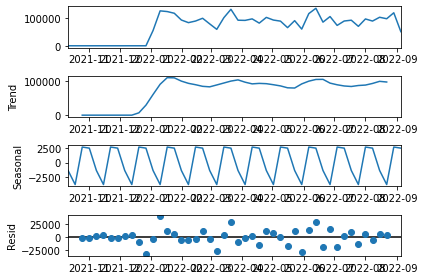

In [19]:
m4=clean.drop(['Hour'], axis=1)
m4['date']=m4.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m4.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()

(array([738064., 738095., 738125., 738156., 738187., 738215., 738246.,
        738276., 738307., 738337., 738368., 738399.]),
 <a list of 12 Text major ticklabel objects>)

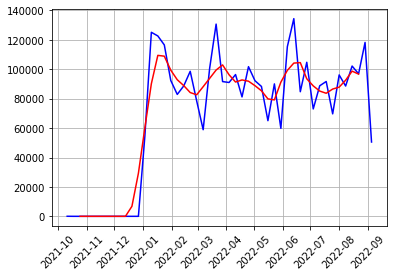

In [20]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m4.index, m4['Count'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)

(array([738064., 738095., 738125., 738156., 738187., 738215., 738246.,
        738276., 738307., 738337., 738368., 738399.]),
 <a list of 12 Text major ticklabel objects>)

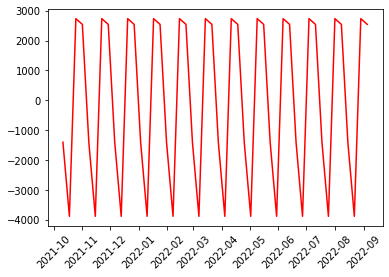

In [21]:
# plot seasonality on matplotlib
plt.plot(decomposition.seasonal.index, decomposition.seasonal, c='red')
plt.xticks(rotation=45)

#### **Visualization conclusions**

> `Trends`

*   From trend graph above, we could see there is a incaresing trend from week to week followed by slight flucation. (excpet
for the beginning three months)


> `Seasonality `

*  From seasonal graph , we could see there is a weekly step amplitude within 3000 to -4000.

> According to the [essay](https://link.springer.com/article/10.2165/00007256-200434010-00001), 10000 steps/day appears to be a reasonable estimate of daily activity for adults to be healthy.
Hence, using 1(`healthy level`) and 0（`healthy level not reached`）to reprsent weather this participant is on the healthy track for each week.

In [23]:
standard=70000
M5update=m4
M5update['determine']=''
for i in range(len(M5update)):
  if M5update['Count'].values[i]>standard:
    M5update['determine'].values[i]='1'
  else:
     M5update['determine'].values[i]='0'
M5update.head()

,Count,date,determine
Date,,,
2021-10-11,41,2021-10-11,0
2021-10-18,0,2021-10-18,0
2021-10-25,0,2021-10-25,0
2021-11-01,0,2021-11-01,0
2021-11-08,0,2021-11-08,0


> Now, using logistic regression to predict the probability of staying on healthy track.





In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
M5update['determine']=M5update['determine'].astype(int) # keep data type consistent
X= M5update['Count'].values
Y= M5update['determine'].values
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Optimization terminated successfully.
         Current function value: 0.437913
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.338  
Dependent Variable: y                AIC:              44.0397
Date:               2022-10-11 04:24 BIC:              45.9109
No. Observations:   48               Log-Likelihood:   -21.020
Df Model:           0                LL-Null:          -31.755
Df Residuals:       47               LLR p-value:      nan    
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     5.0000                                    
-----------------------------------------------------------------
       Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1     0.0000      0.0000    3.8006    0.0001    0.0000    0.0000



Hence the current function value is 0.44.In general, it stands for this person is not on  healthy track based on the step counts of whole dataset.

### **Test conclusions**

We conclude that the trend of step count will start with an increasing tendency followed by constant fluctuations and seasonality would be based on different participants within a specific step amplitude  interval according to their weekly routine.